In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv


In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [153]:
df = pd.read_csv('/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv')

In [154]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [156]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [157]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [158]:
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

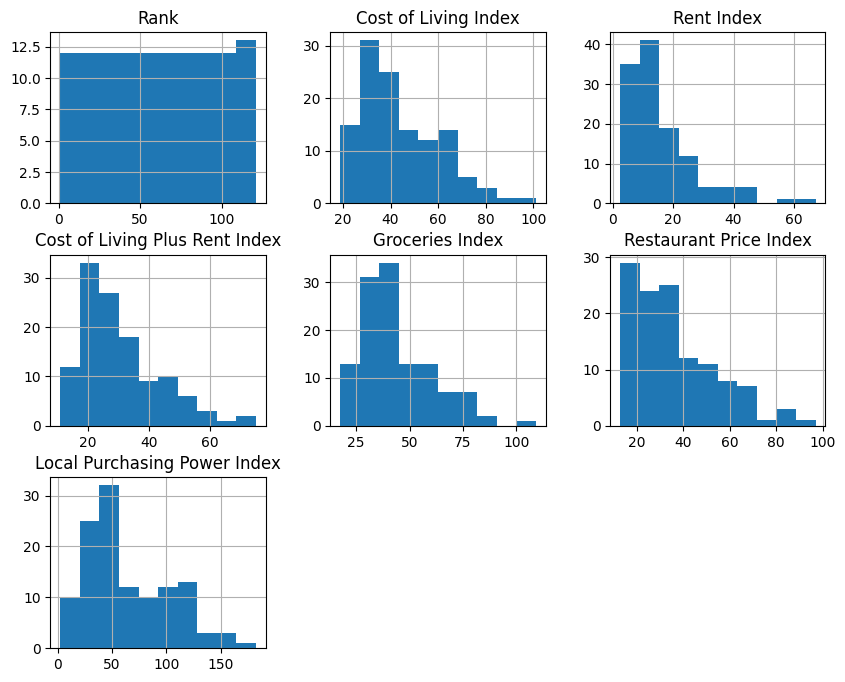

In [159]:
df.hist(figsize=(10, 8))
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


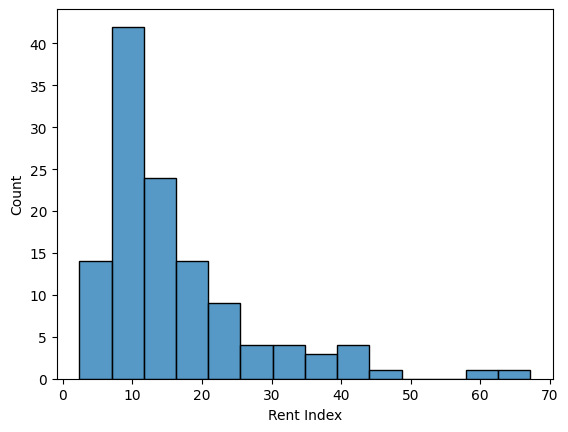

In [160]:
sns.histplot(df['Rent Index'])
plt.show()

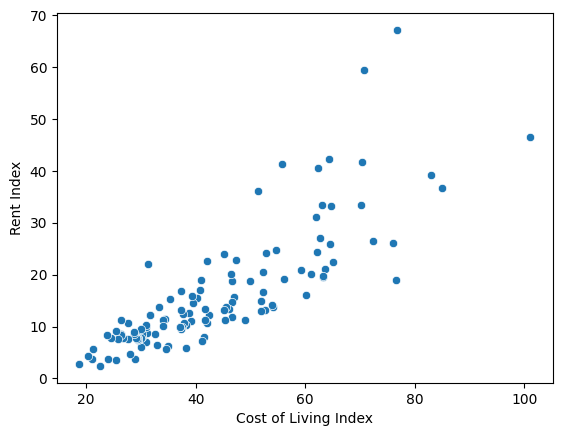

In [161]:
sns.scatterplot(data=df, x='Cost of Living Index', y='Rent Index')
plt.show()

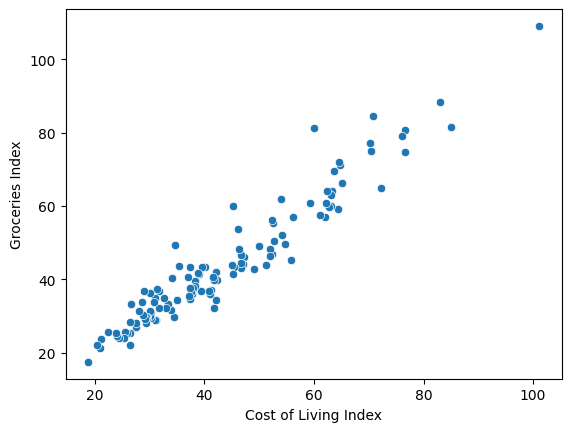

In [162]:
sns.scatterplot(data=df, x='Cost of Living Index', y='Groceries Index')
plt.show()

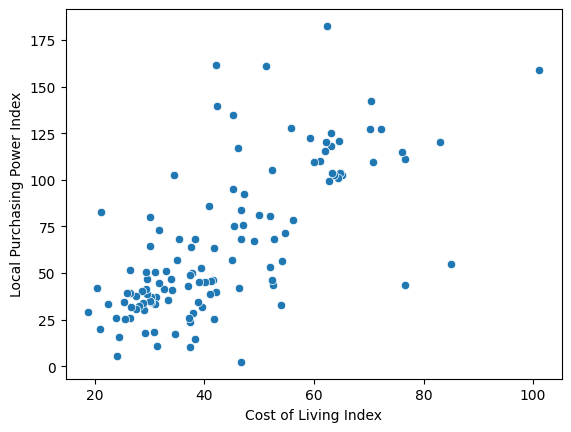

In [163]:
sns.scatterplot(data=df, x='Cost of Living Index', y='Local Purchasing Power Index')
plt.show()

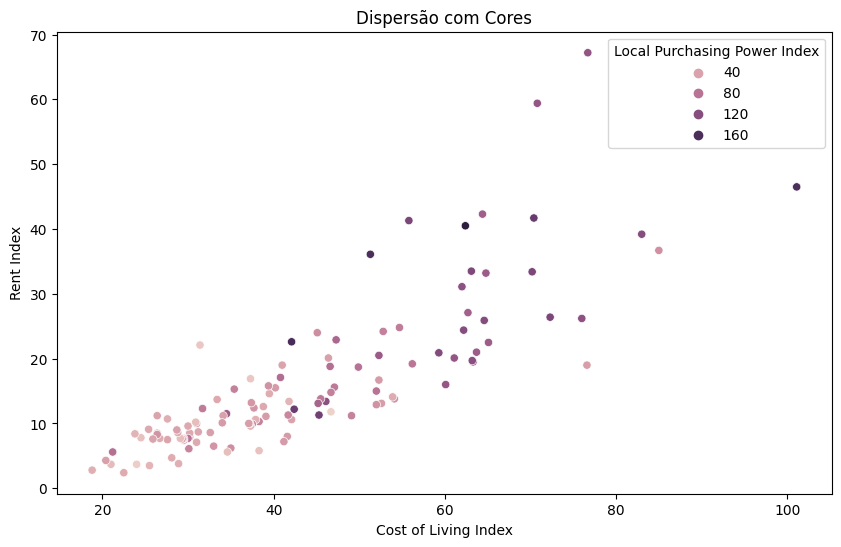

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living Index', y='Rent Index', hue='Local Purchasing Power Index', data=df)
plt.title('Dispersão com Cores')
plt.show()

In [165]:
max_index = df['Cost of Living Index'].idxmax()
max_country = df.loc[max_index, 'Country']
max_value = df.loc[max_index, 'Cost of Living Index']

print(f'O país com o maior custo de vida é {max_country} com um custo de vida de {max_value}.')


O país com o maior custo de vida é Switzerland com um custo de vida de 101.1.


In [166]:
min_index = df['Cost of Living Index'].idxmin()

min_country = df.loc[min_index, 'Country']
min_value = df.loc[min_index, 'Cost of Living Index']

print(f'O país com o menor custo de vida é {min_country} com um custo de vida de {min_value}.')


O país com o menor custo de vida é Pakistan com um custo de vida de 18.8.


In [167]:
brazil_info = df[df['Country'] == 'Brazil']
print(brazil_info)


    Rank Country  Cost of Living Index  Rent Index  \
90    91  Brazil                  30.2         7.9   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
90                            19.5             29.5                    22.6   

    Local Purchasing Power Index  
90                          37.2  


In [168]:
X = df.drop(columns=['Cost of Living Index'])
y = df['Rent Index']



In [169]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

print('Colunas Categóricas:', categorical_features)
print('Colunas Numéricas:', numeric_features)


Colunas Categóricas: Index(['Country'], dtype='object')
Colunas Numéricas: Index(['Rank', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')


In [170]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)

    ])

In [171]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [173]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Rank', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [175]:
y_pred = model.predict(X_test)

In [176]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.40883456756757136
R^2 Score: 0.9962269872417395


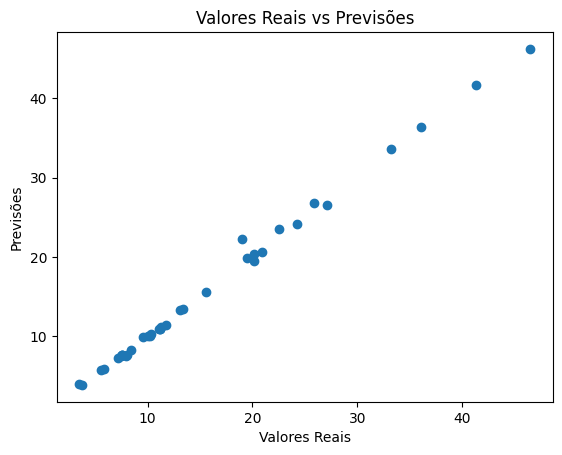

In [177]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()


In [178]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print(f'Mean Cross-Validated MSE: {mean_cv_score}')
print(f'Standard Deviation of CV MSE: {std_cv_score}')


Mean Cross-Validated MSE: 19.36678924999997
Standard Deviation of CV MSE: 36.88116047845693
